| |<font size="5">Outliers البيانات المتطرفة     </font>|
|-:|-|
|<img src="https://software.intel.com/content/dam/develop/external/us/en/images/enhancing-outlier-detection-with-intel-daal-fig-02-721112.png" width=300></img>||
||<font size="4"> تحميل البيانات وحفظها </font>| 
||<font size="4">  تحديد البيانات المتطرفة بناء على التخطيات البيانية </font>| 
||<font size="4"> تحديد البيانات المتطرفة بناء على خوارزميات متخصصة  </font>|  

In [1]:
#تحميل البيانات 
import pandas as pd
df= pd.read_csv("../data/HousePrice1.csv" , index_col=0)

In [2]:
df.sample(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalPorchSF,TotalBath,SnMoSold,CsMoSold
619,620,60,RL,85.0,12244,Pave,NaN,Reg,Lvl,AllPub,...,0,2008,WD,Normal,305000,3744,0,3.5,-0.866025,-0.500000
500,501,160,RM,21.0,1890,Pave,NaN,Reg,Lvl,AllPub,...,0,2007,WD,Normal,113000,1890,28,1.5,0.500000,-0.866025
636,637,30,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,2009,ConLw,Normal,60000,1064,0,1.0,0.500000,0.866025


![](https://image.flaticon.com/icons/png/128/3079/3079166.png)

###  scatter plot   تحديد القيم المتطرفة من خلال توظيف 

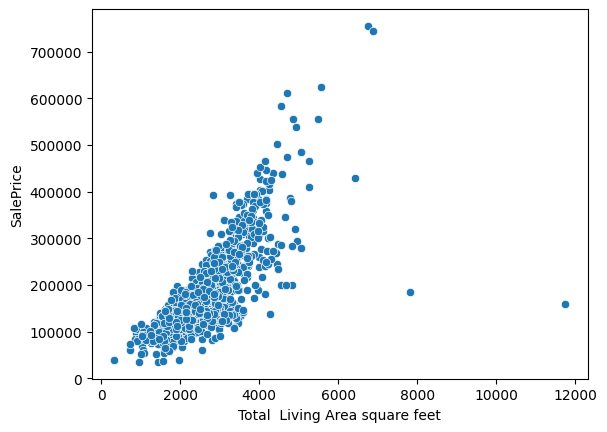

In [5]:
# salePrice in function of the Ground Living Area GrLivArea  
#توزيع  أسعار العقارات في ضوء مساحته  
import seaborn as sns
import matplotlib.pyplot as plt
_=sns.scatterplot( data=df,  x="TotalSF", y="SalePrice" )
plt.xlabel('Total  Living Area square feet')
plt.show()

-  نلاحظ تواجد بعض البيانات المتطرفة اقصى يمين التخطيط البياني

---



/tmp/ipykernel_29852/4147880999.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _=sns.distplot(df.TotalSF )


1.778


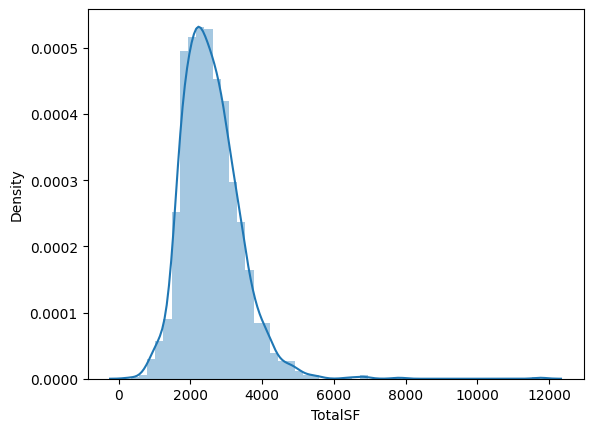

In [6]:
#    توزيع المساحة الكلية 
_=sns.distplot(df.TotalSF )
print(df.TotalSF.skew().round(3))

![](https://miro.medium.com/max/1200/1*nj-Ch3AUFmkd0JUSOW_bTQ.jpeg)

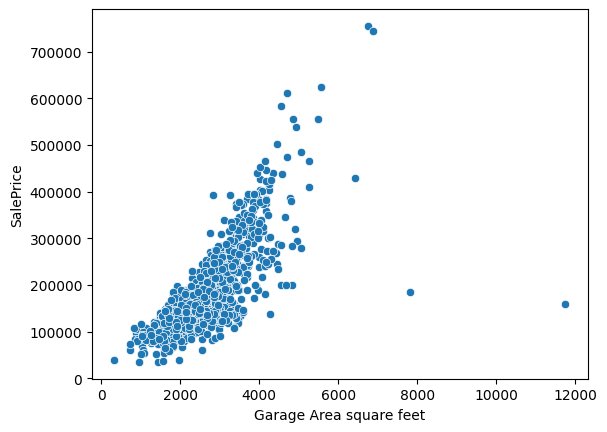

In [7]:
# توزيع  أسعار العقارات في ضوء المساحة الكلية 
_=sns.scatterplot( data=df,  x="TotalSF", y="SalePrice" )
plt.xlabel('Garage Area square feet')
plt.show()

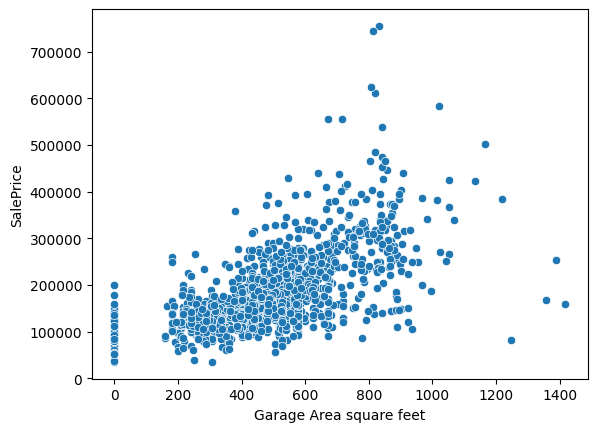

In [8]:
# salePrice in function of the Garage Area GarageArea
# توزيع  أسعار العقارات في ضوء مساحة المرآب 
_=sns.scatterplot( data=df,  x="GarageArea", y="SalePrice" )
plt.xlabel('Garage Area square feet')
plt.show()

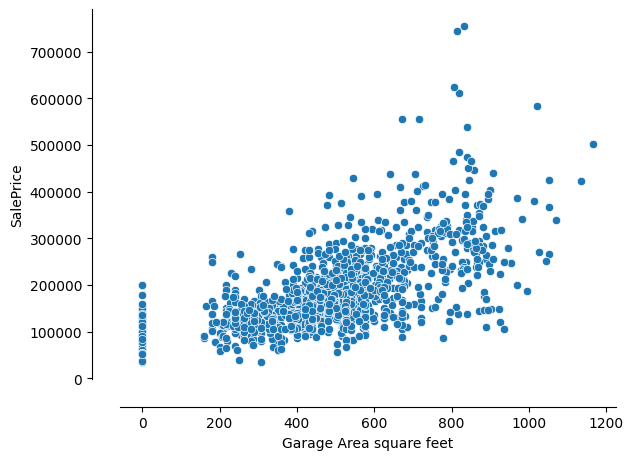

In [9]:
# let's plot the  Log(salePrice)  in function of the Garage Area GarageArea under  1200 sqf
# الاستغناء على مساحات المرآب التي تفوق 1200
df=df[df.GarageArea<1200]
_=sns.scatterplot( data=df,  x="GarageArea", y="SalePrice" )

plt.xlabel('Garage Area square feet')
sns.despine( offset=20)

In [10]:
df[["GarageArea"]].agg(["min", "max"])

,GarageArea
min,0
max,1166


-  نلاحظ تواجد بعض البيانات المتطرفة اقصى يمين التخطيط البياني

- notice those outliers above 
- homes with nor Garages don't exceed 200K

In [11]:
# identify outlers with skweness
# تحديد القيم المتطرفة 
df.GarageArea.skew().round(3)

np.float64(-0.005)

###    تحديد القيم المتطرفة من خلال توظيف الصناديق 

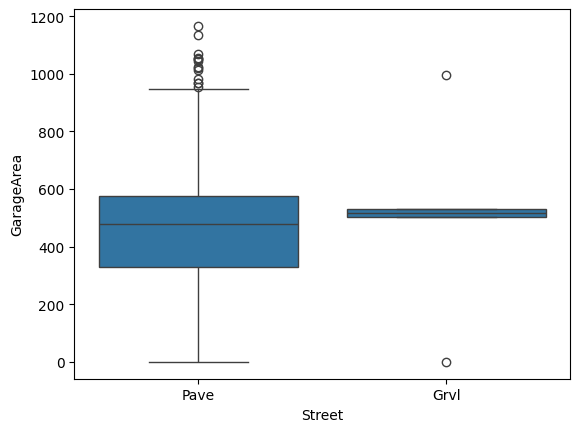

In [12]:
#  مساحة المرآب في ضوء طبيعة تعبيد الطريق 
_=sns.boxplot( data=df, x="Street", y="GarageArea" )

-  نلاحظ تواجد بعض البيانات المتطرفة أعلى الصندوق باللون الأزرق ضمن التخطيط البياني

In [13]:
Q1=df[["Street", "GarageArea"]].groupby("Street").quantile(0.25)
Q1

,GarageArea
Street,
Grvl,504.0
Pave,328.5


In [14]:
Q3=df[["Street", "GarageArea"]].groupby("Street").quantile(.75)
Q3

,GarageArea
Street,
Grvl,529.0
Pave,576.0


In [15]:
# Inter-Quantile  /  Outliers
Q3+1.5*(Q3-Q1)

,GarageArea
Street,
Grvl,566.50
Pave,947.25


In [ ]:
print(boston_df_o1 < (Q1 - 1.5 * IQR)) |(boston_df_o1 > (Q3 + 1.5 * IQR))

NameError: name 'boston_df_o1' is not defined

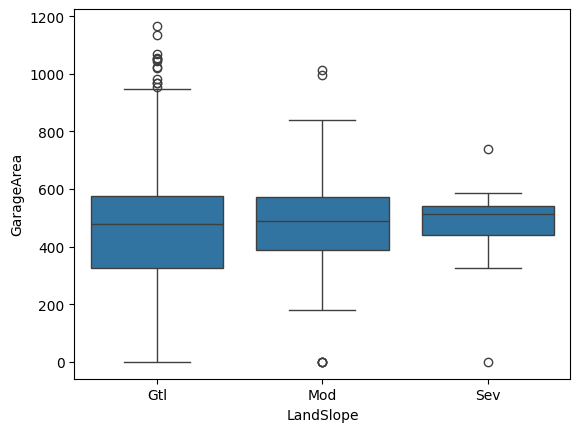

In [18]:
#  مساحة المرآب في ضوء درجة انحدار الطريق 
_=sns.boxplot( data=df, x="LandSlope", y="GarageArea" )

- We can cap  Garage area values to  1200
- notice a better correlation 

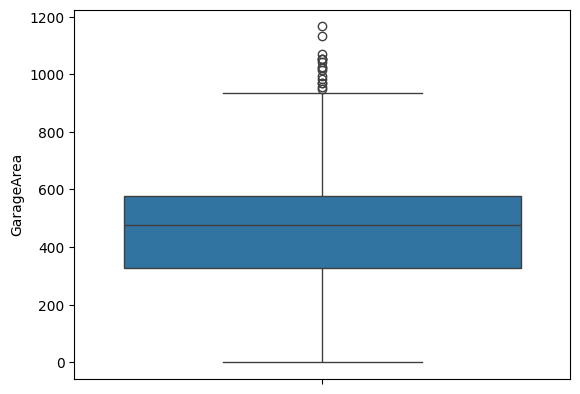

In [19]:
#  مساحة المرآب  
_=sns.boxplot( df.GarageArea)

In [20]:
#GarageArea  أما عن القيم المتطرفة ضمن المتغير 
Q1 = df.GarageArea.quantile(0.25)
Q3 = df.GarageArea.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

247.0


In [21]:
df[(df.GarageArea > (Q1 - 1.5 * IQR)) | (df.GarageArea > (Q3 + 1.5 * IQR))].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalPorchSF,TotalBath,SnMoSold,CsMoSold
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,2008,WD,Normal,208500,2566,61,3.5,8.660254e-01,5.000000e-01
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,2007,WD,Normal,181500,2524,0,2.5,5.000000e-01,-8.660254e-01
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,2008,WD,Normal,223500,2706,42,3.5,-1.000000e+00,-1.836970e-16
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,2006,WD,Abnorml,140000,2473,307,2.0,8.660254e-01,5.000000e-01
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,2008,WD,Normal,250000,3343,84,3.5,-2.449294e-16,1.000000e+00


In [22]:
# حجم قاعدة البيانات الجديدة 
df.shape

(1455, 75)

In [23]:
# البحث عن القيم الصفرية 
df["GarageArea"].isna().sum()

np.int64(0)